In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import os
from sodapy import Socrata

In [2]:
df = pd.read_csv("Household_Income.csv") 

In [3]:
display(df.head(20))
print(df.size)

,ID Household Income Bucket,Household Income Bucket,ID Year,Year,Household Income,Household Income Moe,Geography,ID Geography,Slug Geography,share
0,7,"$40,000-$44,999",2017,2017,1744,310.0,"Hamilton Heights, Manhattanville & West Harlem...",79500US3603802,hamilton-heights-manhattanville-&-west-harlem-...,0.036901
1,15,"$200,000+",2017,2017,4255,456.0,"Hamilton Heights, Manhattanville & West Harlem...",79500US3603802,hamilton-heights-manhattanville-&-west-harlem-...,0.090030
2,14,"$150,000-$199,999",2017,2017,2406,341.0,"Hamilton Heights, Manhattanville & West Harlem...",79500US3603802,hamilton-heights-manhattanville-&-west-harlem-...,0.050908
3,1,"$10,000-$14,999",2017,2017,5768114,16409.0,United States,01000US,united-states,0.048543
4,13,"$125,000-$149,999",2017,2017,2146,382.0,"Hamilton Heights, Manhattanville & West Harlem...",79500US3603802,hamilton-heights-manhattanville-&-west-harlem-...,0.045406
5,2,"$15,000-$19,999",2017,2017,5727180,16801.0,United States,01000US,united-states,0.048198
6,12,"$100,000-$124,999",2017,2017,2983,410.0,"Hamilton Heights, Manhattanville & West Harlem...",79500US3603802,hamilton-heights-manhattanville-&-west-harlem-...,0.063116
7,3,"$20,000-$24,999",2017,2017,5910725,17864.0,United States,01000US,united-states,0.049743
8,11,"$75,000-$99,999",2017,2017,4353,523.0,"Hamilton Heights, Manhattanville & West Harlem...",79500US3603802,hamilton-heights-manhattanville-&-west-harlem-...,0.092104
9,4,"$25,000-$29,999",2017,2017,5619002,16113.0,United States,01000US,united-states,0.047288


1600


In [4]:
df_by_yrs = []
yrs = [2013, 2014, 2015, 2016, 2017]
for x in yrs:
    df_dummy = df.loc[df["Year"] == x]
    df_by_yrs.append(df_dummy)

In [5]:
display(df_by_yrs[0].head())

,ID Household Income Bucket,Household Income Bucket,ID Year,Year,Household Income,Household Income Moe,Geography,ID Geography,Slug Geography,share
128,4,"$25,000-$29,999",2013,2013,5929562,13959.0,United States,01000US,united-states,0.051289
129,1,"$10,000-$14,999",2013,2013,6214548,16925.0,United States,01000US,united-states,0.053754
130,10,"$60,000-$74,999",2013,2013,3678,365.0,"Hamilton Heights, Manhattanville & West Harlem...",79500US3603802,hamilton-heights-manhattanville-&-west-harlem-...,0.078751
131,5,"$30,000-$34,999",2013,2013,2554,492.0,"Hamilton Heights, Manhattanville & West Harlem...",79500US3603802,hamilton-heights-manhattanville-&-west-harlem-...,0.054685
132,1,"$10,000-$14,999",2013,2013,2904,426.0,"Hamilton Heights, Manhattanville & West Harlem...",79500US3603802,hamilton-heights-manhattanville-&-west-harlem-...,0.062179


In [6]:
df_final = []
for d in df_by_yrs:
    d = d.loc[df["Slug Geography"]=="hamilton-heights-manhattanville-&-west-harlem-puma-ny"]
    df_final.append(d.sort_values(by='ID Household Income Bucket' , inplace=False))

In [7]:
display(df_final[4].head(16))

,ID Household Income Bucket,Household Income Bucket,ID Year,Year,Household Income,Household Income Moe,Geography,ID Geography,Slug Geography,share
30,0,"< $10,000",2017,2017,6590,734.0,"Hamilton Heights, Manhattanville & West Harlem...",79500US3603802,hamilton-heights-manhattanville-&-west-harlem-...,0.139435
28,1,"$10,000-$14,999",2017,2017,3568,508.0,"Hamilton Heights, Manhattanville & West Harlem...",79500US3603802,hamilton-heights-manhattanville-&-west-harlem-...,0.075494
26,2,"$15,000-$19,999",2017,2017,2356,455.0,"Hamilton Heights, Manhattanville & West Harlem...",79500US3603802,hamilton-heights-manhattanville-&-west-harlem-...,0.049850
24,3,"$20,000-$24,999",2017,2017,2102,364.0,"Hamilton Heights, Manhattanville & West Harlem...",79500US3603802,hamilton-heights-manhattanville-&-west-harlem-...,0.044475
22,4,"$25,000-$29,999",2017,2017,2490,390.0,"Hamilton Heights, Manhattanville & West Harlem...",79500US3603802,hamilton-heights-manhattanville-&-west-harlem-...,0.052685
20,5,"$30,000-$34,999",2017,2017,2258,380.0,"Hamilton Heights, Manhattanville & West Harlem...",79500US3603802,hamilton-heights-manhattanville-&-west-harlem-...,0.047776
18,6,"$35,000-$39,999",2017,2017,1896,416.0,"Hamilton Heights, Manhattanville & West Harlem...",79500US3603802,hamilton-heights-manhattanville-&-west-harlem-...,0.040117
0,7,"$40,000-$44,999",2017,2017,1744,310.0,"Hamilton Heights, Manhattanville & West Harlem...",79500US3603802,hamilton-heights-manhattanville-&-west-harlem-...,0.036901
14,8,"$45,000-$49,999",2017,2017,1124,257.0,"Hamilton Heights, Manhattanville & West Harlem...",79500US3603802,hamilton-heights-manhattanville-&-west-harlem-...,0.023782
12,9,"$50,000-$59,999",2017,2017,2914,481.0,"Hamilton Heights, Manhattanville & West Harlem...",79500US3603802,hamilton-heights-manhattanville-&-west-harlem-...,0.061656


In [8]:
r = [0,1,2,3,4]
extracted_data = {'<$10,000': [7951, 8008, 7947, 7532, 6590], '$10,000-$14,999': [2904, 3276, 3378, 3251, 3568],
                           '$15,000-$19,999': [3309, 3029, 2615, 2408, 2356],'$20,000-$24,999': [2389, 2118, 2022, 2002, 2102],
                           '$25,000-$29,999': [2407, 2458, 2284, 2326, 2490],'$30,000-$34,999': [2554, 2361, 2419, 2473, 2258],
                           '$35,000-$39,999': [1552, 1594, 1582, 1604, 1896],'$40,000-$44,999': [1957, 1590, 1540, 1629, 1744],
                           '$45,000-$49,999': [1705, 1936, 1849, 1272, 1124],'$50,000-$59,999': [2686, 2619, 2723, 2878, 2914],
                           '$60,000-$74,999': [3678, 3513, 3653, 3845, 4077],'$75,000-$99,999': [4201, 4548, 4798, 4668, 4353],
                           '$100,000-$124,999': [2242, 2267, 2379, 2636, 2983],'$125,000-$149,999': [2032, 2061, 2145, 1935, 2146],
                           '$150,000-$199,999': [2016, 2077, 2068, 2628, 2406],'$200,000+': [3121, 3243, 3380, 3699, 4255]}
b = pd.DataFrame(extracted_data)

display(b)

,"<$10,000","$10,000-$14,999","$15,000-$19,999","$20,000-$24,999","$25,000-$29,999","$30,000-$34,999","$35,000-$39,999","$40,000-$44,999","$45,000-$49,999","$50,000-$59,999","$60,000-$74,999","$75,000-$99,999","$100,000-$124,999","$125,000-$149,999","$150,000-$199,999","$200,000+"
0,7951,2904,3309,2389,2407,2554,1552,1957,1705,2686,3678,4201,2242,2032,2016,3121
1,8008,3276,3029,2118,2458,2361,1594,1590,1936,2619,3513,4548,2267,2061,2077,3243
2,7947,3378,2615,2022,2284,2419,1582,1540,1849,2723,3653,4798,2379,2145,2068,3380
3,7532,3251,2408,2002,2326,2473,1604,1629,1272,2878,3845,4668,2636,1935,2628,3699
4,6590,3568,2356,2102,2490,2258,1896,1744,1124,2914,4077,4353,2983,2146,2406,4255


In [9]:
totals = b.sum(axis=1)
print(totals)

0    46704
1    46698
2    46782
3    46786
4    47262
dtype: int64


In [10]:
#totals=[46704,46698,46782,46786,47262]

In [11]:
l=list(extracted_data.keys())
print(l[0])

<$10,000


In [12]:
bars = []

for x in range(0,16):
    idx = [i / j * 100 for i,j in zip(b[l[x]], totals)]
    bars.append(idx)
print(bars)

[[17.02423775265502, 17.14848601653176, 16.987302808772604, 16.09883298422605, 13.943548728365283], [6.217882836587873, 7.015289734035719, 7.2207259202257275, 6.948659855512333, 7.549405442004146], [7.085046248715314, 6.486359158850485, 5.589756744046856, 5.146838797931005, 4.984977360247133], [5.115193559438164, 4.535526146730053, 4.322175195588047, 4.27905783781473, 4.447547712750201], [5.1537341555327165, 5.263608719859523, 4.882219657133086, 4.971572692685846, 5.268503237273073], [5.468482356971566, 5.05589104458435, 5.1707921850284295, 5.285769247210704, 4.77762261436249], [3.323055841041452, 3.413422416377575, 3.3816425120772946, 3.428376009917497, 4.011679573441666], [4.190219253168894, 3.4048567390466404, 3.291864392287632, 3.481810798101996, 3.6900681308450762], [3.650650907845152, 4.145787828172512, 3.9523748450258647, 2.7187620228273417, 2.37823198341162], [5.751113394998287, 5.608377232429654, 5.820614766363131, 6.151412815799598, 6.165629892937243], [7.8751284686536485, 7.

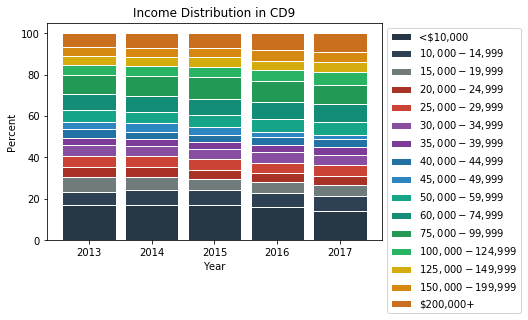

In [13]:
barWidth = 0.85
names = ('2013','2014','2015','2016','2017')
colors = ['#273746','#2E4053','#707B7C','#A93226','#CB4335','#884EA0','#7D3C98','#2471A3','#2E86C1','#17A589','#138D75','#229954','#28B463','#D4AC0D','#D68910','#CA6F1E','#BA4A00']


plt.bar(r, bars[0], color=colors[0], edgecolor='white', width=barWidth, label=l[0])
below=bars[0]
for x in range(1,16):
    plt.bar(r, bars[x], bottom=below, color=colors[x], edgecolor='white', width=barWidth, label=l[x])
    below=[i+j for i,j in zip(below, bars[x])]

# Custom x axis
plt.xticks(r, names)
plt.xlabel("Year")
plt.yticks([0,20,40,60,80,100])
plt.ylabel("Percent")
plt.title("Income Distribution in CD9")
 
# Add a legend
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
 
# Show graphic
plt.show()

There is a slight shift in income demographics, but is it really large enough to be significant?

The code below is for the rent vs income visualization.


In [14]:
print(len(bars))

16


In [15]:
for x in range(0,5):
    print("\n")
    t = 0
    passed25 = False
    passed50 = False
    passed75 = False
    for y in range(0,16):
        t+= bars[y][x]
        if t>=25 and not passed25:
            print("25 percentile: " + str(l[y]))
            passed25 = True
        if t>=50 and not passed50:
            print("50 percentile: " + str(l[y]))
            passed50 = True
        if t>=75 and not passed75:
            print("75 percentile: " + str(l[y]))
            passed75 = True



25 percentile: $15,000-$19,999
50 percentile: $40,000-$44,999
75 percentile: $75,000-$99,999


25 percentile: $15,000-$19,999
50 percentile: $40,000-$44,999
75 percentile: $75,000-$99,999


25 percentile: $15,000-$19,999
50 percentile: $40,000-$44,999
75 percentile: $75,000-$99,999


25 percentile: $15,000-$19,999
50 percentile: $45,000-$49,999
75 percentile: $75,000-$99,999


25 percentile: $15,000-$19,999
50 percentile: $45,000-$49,999
75 percentile: $75,000-$99,999


Median and percentiles don't vary as much... perhaps can bound the mean from the upper/lower values of the price ranges as below.

In [16]:
lows = [0,10000,15000,20000,25000,30000,35000,40000,45000,50000,60000,75000,100000,125000,150000,200000]
highs = [10000,14999,19999,24999,29999,34999,39999,44999,49999,59999,74999,99999,124999,149999,199999,300000]

In [17]:
upper = []
lower = []
for x in range(0,5):
    dummylow = 0
    dummyhigh = 0
    sum_ = 0
    for y in range(0,16):
        dummylow+=bars[y][x]*lows[y]
        dummyhigh+=bars[y][x]*highs[y]
        sum_+=bars[y][x]
    dummylow/=sum_
    dummyhigh/=sum_
    upper.append(dummyhigh)
    lower.append(dummylow)

print(upper)
print(lower)

[73389.7389516958, 74680.70480534498, 76419.33959642598, 80420.7336596418, 83612.49170581017]
[54544.15039397054, 55391.02317015719, 56660.574579966655, 59499.102295558514, 61888.938259066475]
